## house price prediction

In [1]:
import pandas as pd

In [2]:
house = pd.read_csv("book1.csv")

In [3]:
# head() is used to display the first 5 rows of the data

In [4]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# info() displays the attributes of the data

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.287637,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705164,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.211000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

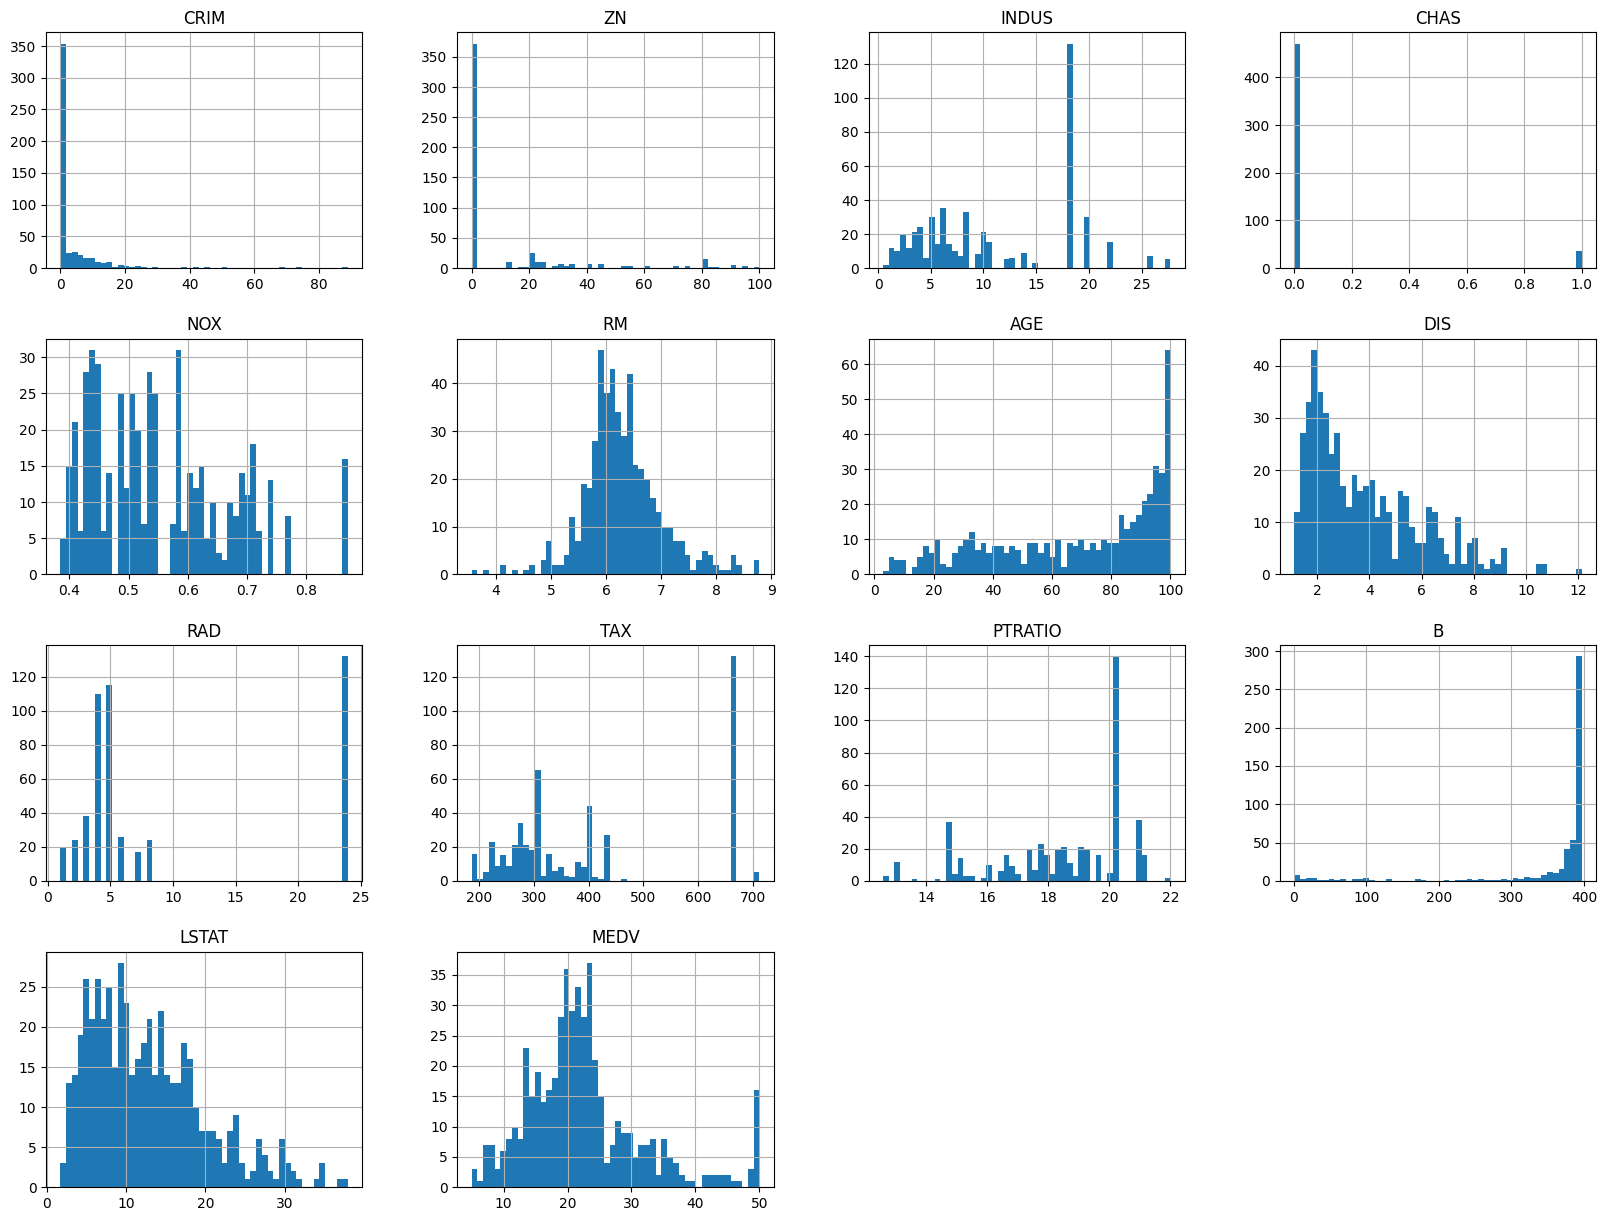

In [10]:
house.hist(bins=50 , figsize=(20,15))

In [11]:
import numpy as np
def split_test(data , test_ratio):
      np.random.seed(31)
      shuffle = np.random.permutation(len(data))
      tset = int(len(data) * test_ratio)
      tindex = shuffle[:tset]
      train = shuffle[tset:]
      return data.iloc[tindex] , data.iloc[train]

In [12]:
tindex , train = split_test( house , 0.2)

In [13]:
print(f"rows of train set : {len(train)} \n rows in test set : {len(tindex)}")

rows of train set : 405 
 rows in test set : 101


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits =1,test_size=0.2, random_state=31)
for train , tindex  in split.split(house , house['CHAS']) :
    strain= house.loc[train]
    stindex=house.loc[tindex]

In [15]:
stindex['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [16]:
cor_matrix=house.corr()
cor_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695627
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

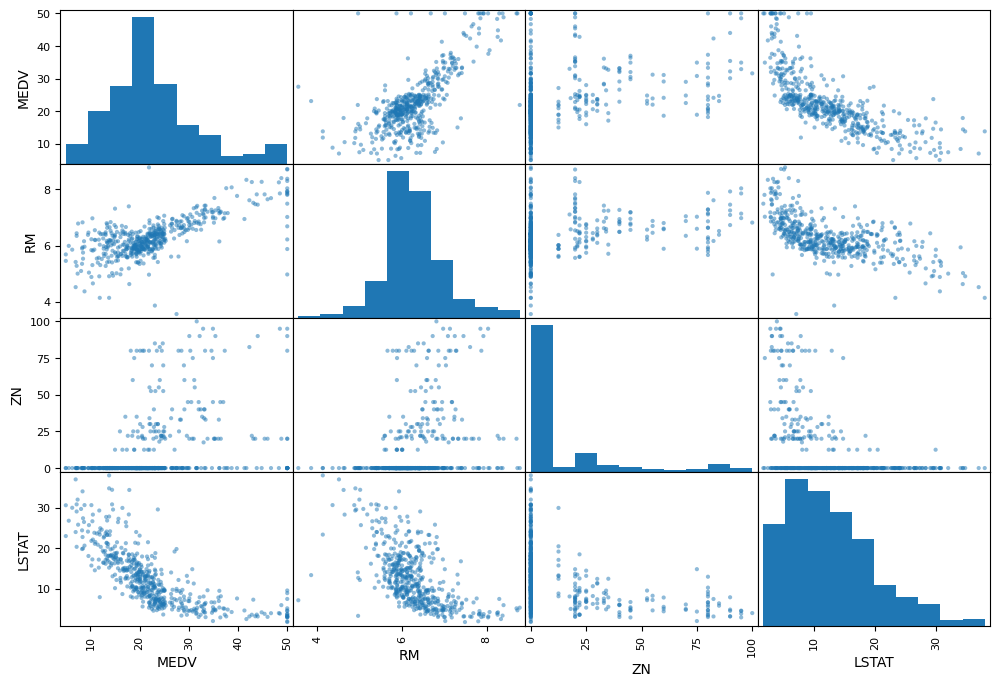

In [17]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV','RM','ZN','LSTAT']
scatter_matrix(house[attributes], figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

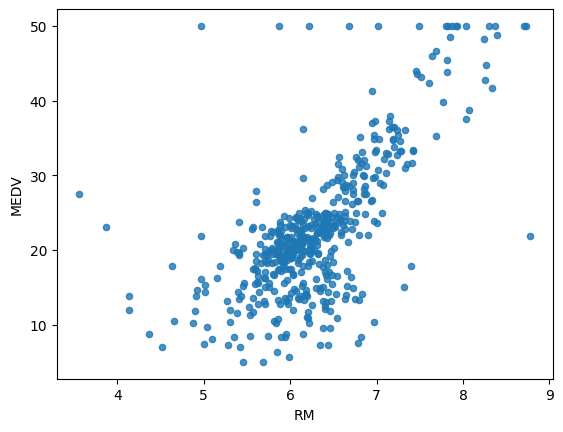

In [18]:
house.plot(kind='scatter',x='RM',y='MEDV',alpha=0.8)

## attribute combination

In [19]:
house["TAXRM"] = house['TAX']/house['RM']

In [20]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [21]:
cor_matrix = house.corr()
cor_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695627
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.539115
LSTAT     -0.737663
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

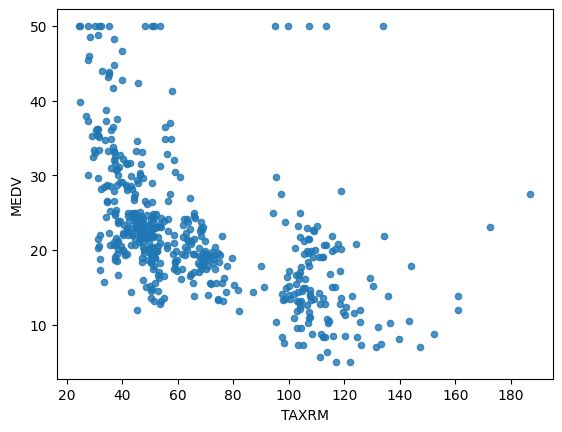

In [22]:
house.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [23]:
house = strain.drop("MEDV", axis=1)
house_labels = strain["MEDV"].copy()

## missing atteibutes

In [24]:
# To take care of missing attributes, you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the value to some value(0, mean or median)

In [25]:
a = house.dropna(subset=["RM"]) #Option 1
a.shape
# Note that the original housing dataframe will remain unchanged

(400, 13)

In [26]:
house.drop("RM", axis=1).shape # Option 2
# Note that there is no RM column and also note that the original housing dataframe will remain unchanged

(404, 12)

In [27]:
median = house["RM"].median() # Compute median for Option 3
house["RM"].fillna(median) # Option 3
# Note that the original housing dataframe will remain unchanged

2      7.185
95     6.625
433    6.436
108    6.474
86     6.209
       ...  
66     5.787
18     5.456
380    6.968
438    5.935
217    6.642
Name: RM, Length: 404, dtype: float64

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(house)

SimpleImputer(strategy='median')

In [29]:
imputer.statistics_

array([2.62660e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.67000e+01, 3.26745e+00, 5.00000e+00, 3.30000e+02,
       1.91000e+01, 3.91960e+02, 1.12350e+01])

In [30]:
X = imputer.transform(house)

In [31]:
house_tr = pd.DataFrame(X, columns=house.columns)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])


In [33]:
house_num_tr = my_pipeline.fit_transform(house)

In [34]:
house_num_tr.shape

(404, 13)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(house_num_tr, house_labels)

RandomForestRegressor()

In [36]:
some_data = house.iloc[:5]

In [37]:
some_labels = house_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([34.454, 27.81 , 14.724, 20.046, 22.158])

In [38]:
list(some_labels)

[34.7, 28.4, 14.3, 19.8, 22.5]

In [39]:
from sklearn.metrics import mean_squared_error
house_predictions = model.predict(house_num_tr)
mse = mean_squared_error(house_labels, house_predictions)
rmse = np.sqrt(mse)

In [40]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, house_num_tr, house_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [41]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())
    

In [42]:
print_scores(rmse_scores)

Scores: [2.74826275 3.0629149  4.64272172 2.53186973 2.73363923 4.47430542
 2.96444823 3.31697281 3.45541027 3.44948011]
Mean:  3.3380025171724603
Standard deviation:  0.6781035780361551


In [43]:
from joblib import dump, load
dump(model, 'hpre.joblib') 

['hpre.joblib']

In [44]:
X_test = stindex.drop("MEDV", axis=1)
Y_test = stindex["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
#print(final_predictions,list(Y_test))

In [45]:
final_rmse

3.0954721265542857

In [46]:
prepared_data[0]

array([-0.40274569, -0.50120187, -0.56568808, -0.27288841, -0.72006288,
        1.30248611, -0.2331067 ,  0.49144855, -0.86702324, -0.98813139,
       -0.30606072,  0.39552649, -1.20695779])

## Using the model

In [47]:
from joblib import dump, load
import numpy as np
model = load('hpre.joblib') 
features = np.array([[-0.40274569, -0.50120187, -0.56568808, -0.27288841, -0.72006288,
        1.30248611, -0.2331067 ,  0.49144855, -0.86702324, -0.98813139,
       -0.30606072,  0.39552649, -1.20695779]])
model.predict(features)

array([34.454])